In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors
import cartopy.crs as ccrs
import numpy as np
import matplotlib.ticker as mticker
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# 设置字体为 新罗马
plt.rc('font',family='Times New Roman')

In [2]:
ds=xr.open_dataset('./data/SLP_100-180_0-60_2018.nc')['sp']
ds

c:\Users\Linzy\.conda\envs\py310\lib\site-packages\xarray\backends\plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
No module named 'eccodes'
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


<xarray.DataArray 'sp' (time: 1460, latitude: 241, longitude: 321)>
[112947060 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 100.0 100.2 100.5 100.8 ... 179.5 179.8 180.0
  * latitude   (latitude) float32 60.0 59.75 59.5 59.25 ... 0.75 0.5 0.25 0.0
  * time       (time) datetime64[ns] 2018-01-01 ... 2018-12-31T18:00:00
Attributes:
    units:          Pa
    long_name:      Surface pressure
    standard_name:  surface_air_pressure

In [3]:
lons=ds.longitude.data
lats=ds.latitude.data
SLP=ds/100

Text(0.0, 1.0, 'Surface pressure')

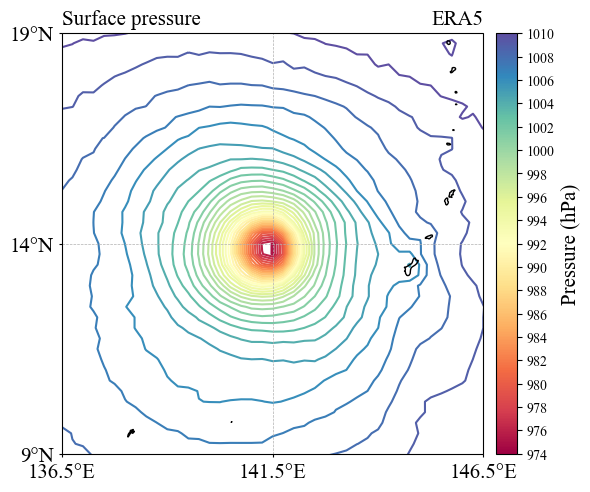

In [4]:
fig = plt.figure(figsize=(8,6))
ax=fig.subplots(1,1,subplot_kw={"projection":ccrs.PlateCarree()})
LonC, LatC = round(141.5 / 0.25, 0) * 0.25, round(14 / 0.25, 0) * 0.25
lon1=LonC - 5
lon2=LonC + 5
lat1=LatC - 5
lat2=LatC + 5
ax.set_extent([lon1,lon2,lat1,lat2],crs=ccrs.PlateCarree())
plt.tick_params(labelsize=15)

gl = ax.gridlines(draw_labels=True, linewidth=0.5,linestyle="--")
gl.top_labels,gl.bottom_labels,gl.right_labels,gl.left_labels = False,False,False,False
gl.xlocator = mticker.FixedLocator(np.arange(lon1 ,lon2,5))
gl.ylocator = mticker.FixedLocator(np.arange(lat1,lat2,5))

ax.set_xticks(np.arange(lon1,lon2+5,5),crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(lat1,lat2+5,5),crs=ccrs.PlateCarree())
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.tick_params(labelcolor='k',length=2)

prelv1=np.arange(int(SLP.sel(time='2018-09-11T00').loc[lat2:lat1,lon1:lon2].min().data),int(SLP.sel(time='2018-09-11T00').loc[lat2:lat1,lon1:lon2].max().data),1)
prelv2=np.arange(int(SLP.sel(time='2018-09-11T00').loc[lat2:lat1,lon1:lon2].min().data),int(SLP.sel(time='2018-09-11T00').loc[lat2:lat1,lon1:lon2].max().data),2)

im=ax.contour(lons,lats,SLP.sel(time='2018-09-11T00'),levels=prelv1,cmap='Spectral',zorder=1)
ax.coastlines(zorder=3)

################ 关键代码 ################
norm= matplotlib.colors.Normalize(vmin=im.cvalues.min(),vmax=im.cvalues.max())
sm = plt.cm.ScalarMappable(norm=norm, cmap = im.cmap)
cb= fig.colorbar(sm,ticks=prelv2,ax=ax,orientation='vertical',shrink=0.91,fraction=0.3,pad=0.02)
cb.set_label(label="Pressure (hPa)",size=15)
##########################################

plt.title('ERA5',loc='right',fontsize=15)
plt.title('Surface pressure',loc='left',fontsize=15)